In [1]:
import sys
sys.path.append('..')

In [2]:
import pickle

In [3]:
with open('../data/100_samples_seed42.pkl', 'rb') as fp:
    samples = pickle.load(fp)

In [4]:
with open('../data/psy_weights.pckl', 'rb') as fp:
    psy_weights = pickle.load(fp)

In [5]:
with open('../data/psy_weights2.pckl', 'rb') as fp:
    psy_weights2 = pickle.load(fp)

In [7]:
from control_variates.uncertainty_quantification import ClassificationUncertaintyMCMC

In [8]:
from mnist_utils import load_mnist_dataset
train_dl, valid_dl = load_mnist_dataset('../data/mnist/', 100, [3, 5])

In [9]:
x_new, y_new = next(iter(train_dl))
train_x, train_y = next(iter(valid_dl))

In [10]:
from control_variates.model import LogRegression

In [11]:
trajectories = [[LogRegression(784)
                 for j in range(len(samples[i][0]))]
                for i in range(len(samples))]

for i in range(len(samples)):
    for j in range(len(samples[i][0])):
        trajectories[i][j].load_state_dict(samples[i][0][j])

priors = [samples[i][1] for i in range(len(samples))]

In [12]:
from control_variates.cv import PsyLinear, SteinCV
from control_variates.cv_utils import state_dict_to_vec, compute_naive_variance
from control_variates.model import get_binary_prediction
import numpy as np

In [37]:
psy_models2 = [PsyLinear(1570) for _ in range(len(psy_weights2))]
for i in range(len(psy_weights)):
    psy_models2[i].load_state_dict(psy_weights2[i])

In [38]:
ncv_s = [SteinCV(psy_model, train_x, train_y, prior, len(train_dl.dataset)) for psy_model, prior in zip(psy_models, priors)]

In [39]:
from tqdm import tqdm

In [44]:
predictions = []
predictions2 = []
for models, ncv in tqdm(zip(trajectories, ncv_s)):
    uq = ClassificationUncertaintyMCMC(models, ncv)
    predictions.append(uq.estimate_emperical_mean(x_new[20:21], use_cv=True).mean().item())
    predictions2.append(uq.estimate_emperical_mean(x_new[20:21], use_cv=False).mean().item())

94it [00:07, 12.95it/s]


In [41]:
predictions

[-0.5529963970184326,
 -0.3034396171569824,
 -0.3084177076816559,
 0.27098724246025085,
 0.4668087363243103,
 0.07207915931940079,
 0.8103074431419373,
 -0.14991137385368347,
 -0.16540096700191498,
 0.676304042339325,
 -0.24170571565628052,
 -0.6263117790222168,
 -0.5036830306053162,
 2.065418004989624,
 0.9156368970870972,
 -0.5197111964225769,
 -0.45443570613861084,
 0.6326250433921814,
 0.7651432156562805,
 0.5253451466560364,
 0.4691844880580902,
 0.24548174440860748,
 0.6366735696792603,
 0.1285567432641983,
 -0.47524312138557434,
 0.003110691672191024,
 0.45746180415153503,
 -0.2538130283355713,
 0.7143682837486267,
 -0.6687003970146179,
 0.3889327943325043,
 0.3091377019882202,
 0.33664149045944214,
 -0.09958727657794952,
 -0.7406415343284607,
 -0.38194096088409424,
 0.8116920590400696,
 -0.5187420845031738,
 0.5510967969894409,
 0.8280174732208252,
 0.1886402666568756,
 -0.2231098711490631,
 0.33123359084129333,
 0.2600928843021393,
 0.3950338661670685,
 -0.5814920663833618,
 0

In [42]:
!pip install seaborn
import seaborn as sns

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8a1c5ceef0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8a1a4155c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8a1c5cebe0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f8a1a415c50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8a1a415f98>,
 'means': []}

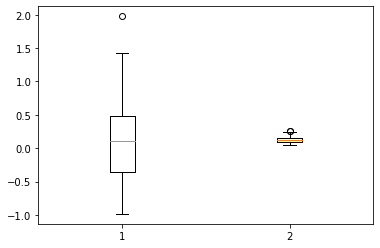

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
fig7, ax7 = plt.subplots()
#ax7.boxplot(predictions)
ax7.boxplot([predictions, predictions2])